In [5]:
import numpy as np
import matplotlib.pyplot as plt
import functions

tmax = 50
L = 50
N = 10
vmax = 5
p = 0.2

simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)
functions.plot_simulation(simulation)


points = np.zeros((tmax, L))
for i in range(L):
    for j in range(tmax):
        if simulation[j][i] > -1:
            points[j][i] = 1
        else:
            points[j][i] = 0

plt.figure(dpi=150)
plt.imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()

TypeError: '>' not supported between instances of 'list' and 'int'

Flow vs density

The time-averaged flow q between i and i+1 is $q = \frac{1}{T}\sum_{t=t_0+1}^{t_0+T}n_{i,i+1}(t)$

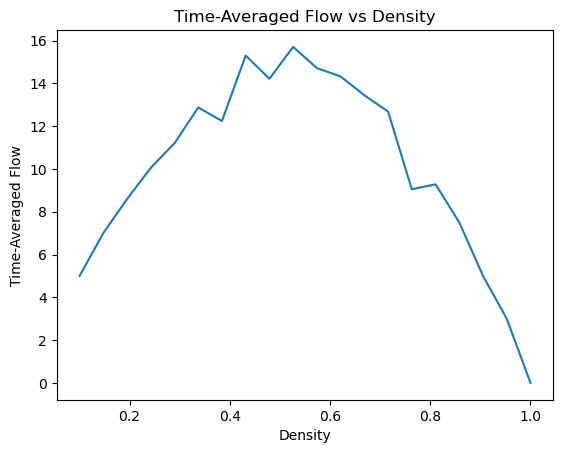

In [6]:

# Parameters
L = 50  # number of cells in row
t_max = 100  # number of iterations
v_max = 5
p = 0.2
N = 10
densities = np.linspace(0.1, 1.0, 20)

flow_vs_density = []

for density in densities:
    positions, flow_counts = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max)
    time_averaged_flow = functions.calculate_time_averaged_flow(flow_counts, t_max)
    flow_vs_density.append(time_averaged_flow)

# Plotting
plt.plot(densities, flow_vs_density)
plt.xlabel('Density')
plt.ylabel('Time-Averaged Flow')
plt.title('Time-Averaged Flow vs Density')
plt.show()
